# 卷积神经网络对图片进行分类。kaggle
# 使用数据迁移，resnet50

# 应用 Appmlications   
#### https://keras.io/zh/applications/

### Keras 的应用模块（keras.applications）提供了带有预训练权值的深度学习模型，这些模型可以用来进行预测、特征提取和微调（fine-tuning）。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import os,time
import numpy as np
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__version__)


2.0.0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
3.1.3
1.18.1
1.0.1
0.22.2
2.0.0
2.2.4-tf


In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/10-monkey-species/monkey_labels.txt
/kaggle/input/10-monkey-species/training/training/n5/n5027.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5161.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5021.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5154.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5071.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5145.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5038.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5020.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5054.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5019.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5044.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5159.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5018.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5110.jpg
/kaggle/input/10-monkey-species/training/training/n5/n5047.jpg
/kagg

In [49]:
train_dir = '/kaggle/input/10-monkey-species/training/training'
valid_dir = '/kaggle/input/10-monkey-species/validation/validation'
label_file = '/kaggle/input/10-monkey-species/monkey_labels.txt'
print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(label_file))
print(os.listdir(train_dir))

True
True
True
['n5', 'n3', 'n6', 'n4', 'n2', 'n8', 'n0', 'n7', 'n9', 'n1']


In [50]:

lables = pd.read_csv(label_file,header=0)
print(lables)

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

In [51]:
height = 224#定义图片大小
width = 224
channels = 3#彩色图片，3通道
batch_size = 24
num_classes = 10
keras.applications.
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.resnet50.preprocess_input,
#  resnet50.preprocess_input 的预处理图像函数
#     rescale = 1./255,resner50已经做了归一化,不用再做了
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range =0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip= True,
    fill_mode='nearest',
)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(height,width),
                                                   batch_size=batch_size,
                                                   seed = 7,
                                                   shuffle= True,
                                                   class_mode = 'categorical')
valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.resnet50.preprocess_input,)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                   target_size=(height,width),
                                                   batch_size=batch_size,
                                                   seed = 7,
                                                   shuffle= False,
                                                   class_mode = 'categorical')

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num,valid_num)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [52]:
for i in range(2):
    x,y = train_generator.next()
    print(x.shape,y.shape)
    print(y)

(64, 128, 128, 3) (64, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.

In [53]:
resnet50_fine_tune = keras.models.Sequential()
resnet50_fine_tune.add(keras.applications.ResNet50(include_top = False,#去掉最后一层，ResNet50有1000类，这里只有10类
                      pooling = 'avg',#在连接全连接层前需要做展平，或是pooling
                      weights = 'imagenet'#None从头开始训练，imagenet下载训练好的模型进行训练
                                                  ))

resnet50_fine_tune.add(keras.layers.Dense(num_classes,activation='softmax'))
resnet50_fine_tune.layers[0].trainable=False#前面迁移的层不训练，只有最后一层训练

resnet50_fine_tune.compile(loss ='categorical_crossentropy',
             optimizer='sgd',metrics=['accuracy'])
resnet50_fine_tune.summary()

#softmax激活函数，就是将输入数据取指数，然后归一化后，谁的数值较大谁的概率就越大。
#这解决了输出数据中概率和必需为1。而且输出概率值与输入值之间成正相关的问题。

# categorical_crossentropy分类交叉熵函数
# 一般来说，如果最后一层接上softmax作为分类概率输出时，
# 都会用categorical_crossentropy作为损失函数，所以框架中会进行优化，
# 对这两条公式的梯度合起来计算，发现合起来以后，loss计算就会超简单。

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 128)      

In [54]:
epochs = 10#使用了数据迁移，一般十次就能达到好的效果
history = resnet50_fine_tune.fit_generator(train_generator,
                             steps_per_epoch=train_num//batch_size,
                              epochs= epochs,
                          validation_data = valid_generator,
                              validation_steps = valid_num//batch_size
                             )

Train for 17 steps, validate for 4 steps
Epoch 1/3
17/17 [==============================] - 39s 2s/step - loss: 16.3701 - accuracy: 0.1267 - val_loss: 3.7044 - val_accuracy: 0.2734
Epoch 2/3
17/17 [==============================] - 39s 2s/step - loss: 2.8007 - accuracy: 0.2456 - val_loss: 2.0732 - val_accuracy: 0.2891
Epoch 3/3
17/17 [==============================] - 38s 2s/step - loss: 1.9505 - accuracy: 0.3462 - val_loss: 1.7796 - val_accuracy: 0.4297


In [55]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


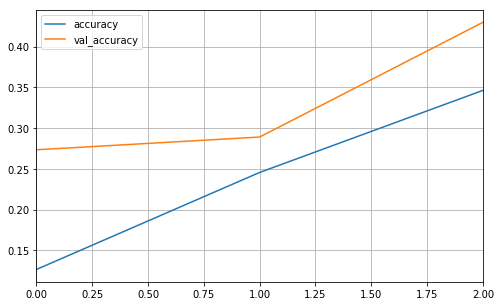

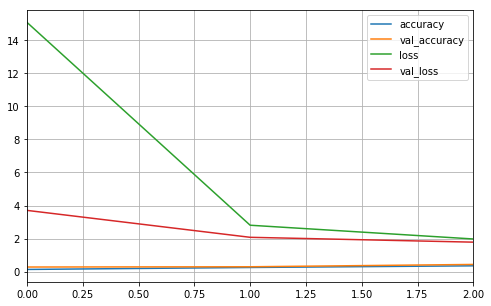

In [63]:
data={}
def plot_learning_curves(history,label, epochs, min_value, max_value):
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize = (8,5))
    plt.grid(True)
#     plt.axis([0,epochs],[min_value,max_value])
    
plot_learning_curves(history,'accuracy',epochs,0,1)
plot_learning_curves(history,'loss',epochs,1,2.5)

# 训练最后的几层

In [2]:
# resner50 的网络结构
resnet50 = keras.applications.ResNet50(include_top = False,
                                                      pooling = 'avg',
                                                      weights = 'imagenet')
resnet50.summary()

 1482752/94765736 [..............................] - ETA: 4:08:12

KeyboardInterrupt: 

In [ ]:
for layer in resnet50[0: -5]:
    layer.trainable = False#最后5层没有设为false，要被训练

resnet50_new = keras.models.Sequential([
      resnet50,
        keras.layers.Dense(num_classes, activation = 'softmax')
])
resnet50_new.compile(loss ='categorical_crossentropy',
             optimizer='sgd',metrics=['accuracy'])
resnet50_new.summary()